## Data Augmentation
0. 환경설정, 데이터 불러오기
1. Easy Data Augmentation

#### 0. 환경설정, 데이터 가져오기

In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
pd.set_option('display.max_colwidth', None)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# [matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [13]:
dataset_train = pd.read_csv('/opt/level2_nlp_datacentric-nlp-12/data/train.csv')
dataset_val = pd.read_csv('/opt/level2_nlp_datacentric-nlp-12/data/dev.csv')
dataset_train.head(3)

,ID,text,target,url,date
0,ynat-v1_train_35704,中 관광객 신규예약 전혀 없습니다…韓 관광업계 휴폐업 직면종합,2,https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=103&sid2=237&oid=001&aid=0009101194,2017.03.12. 오후 1:58
1,ynat-v1_train_27306,허재 농구대표팀 감독 점수 벌릴 때 못 벌려 역전 허용,5,https://sports.news.naver.com/news.nhn?oid=001&aid=0009925095,2018.02.26 22:25
2,ynat-v1_train_30529,제3차 사행산업 건전발전 종합계획 공개 세미나,2,https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=102&sid2=257&oid=001&aid=0010267313,2018.08.13. 오후 3:30
3,ynat-v1_train_20776,中보건당국 흑사병 주의 당부…환자 1명 위중종합,4,https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=231&oid=001&aid=0011211873,2019.11.14. 오전 11:50
4,ynat-v1_train_13592,경기 북부권 8개 시·군 오존주의보 두시간만에 해제종합,3,https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=103&sid2=248&oid=001&aid=0010134845,2018.06.07. 오후 7:52
...,...,...,...,...,...
31969,ynat-v1_train_26243,이스라엘 네타냐후 대연정 제안…청백당 간츠 내가 총리돼야종합,4,https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=234&oid=001&aid=0011091544,2019.09.19. 오후 9:04
31970,ynat-v1_train_11049,국내 주식형 펀드 8일 만에 자금 순유출,1,https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259&oid=001&aid=0009902247,2018.02.19. 오전 8:08
31971,ynat-v1_train_28033,하나은행 DLF 손해배상 검토자료 금감원 검사 직전 삭제종합,1,https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=101&sid2=259&oid=001&aid=0011157830,2019.10.21. 오후 4:24
31972,ynat-v1_train_00626,힐러리가 후보인데 왜 신문1면에 빌 클린턴…네티즌 갸우뚱,4,https://news.naver.com/main/read.nhn?mode=LS2D&mid=shm&sid1=104&sid2=232&oid=001&aid=0008570286,2016.07.28. 오전 2:29


#### 1. Easy Data Augmentation
1. RD
2. RS

In [7]:
from koeda import RD,RI,SR,RS

In [9]:
text = '성범죄영상 유통 웹하드 특별수사 靑 청원 참여 20만 넘어  '

In [10]:
# 확률 p를 통해 문장 내에 있는 각 단어들을 랜덤하게 삭제한다.

augmenter = RD(morpheme_analyzer = None)
result = augmenter(text, p = 0.1, repetition = 3)
print(text, '    ', result)

성범죄영상 유통 웹하드 특별수사 靑 청원 참여 20만 넘어        ['성범죄영상 유통 웹하드 특별수사 靑 20만 넘어', '성범죄영상 유통 웹하드 특별수사 靑 청원 20만', '성범죄영상 웹하드 수사 靑 청원 참여 20만 넘어']


##### RD 증강

In [11]:
# def agg_RD(input_row) :
#     dfdf = pd.DataFrame()
#     text = input_row['text']
#     augmenter = RD(morpheme_analyzer = None)
#     repetition = 2
#     result = augmenter(text, p = 0.1, repetition = repetition)
#     for i in range(repetition) :
#         rd_text = result[i]
#         dfdfdf = pd.DataFrame({'ID': [input_row['ID']],
#                             'text': [rd_text],
#                             'target': [input_row['target']],
#                             'url': [input_row['url']],
#                             'date': [input_row['date']],
#                             })
#         dfdf = pd.concat([dfdf,dfdfdf],ignore_index=True)
#     return dfdf

In [14]:
def agg_RD(input_row) :
    dfdf = pd.DataFrame()
    text = input_row['text']
    augmenter = RD(morpheme_analyzer = None)
    result = augmenter(text, p = 0.1, repetition = 1)
    dfdfdf = pd.DataFrame({'ID': [input_row['ID']],
                        'text': [result],
                        'target': [input_row['target']],
                        'url': [input_row['url']],
                        'date': [input_row['date']],
                        })
    dfdf = pd.concat([dfdf,dfdfdf],ignore_index=True)
    return dfdf

In [ ]:
agg_dataframe_RD_train = pd.DataFrame()
for i in tqdm(range(0, len(dataset_train),2)) :  # 이 부분으로 증강 비율 조절 가능
    dfdfdf = agg_RD(dataset_train.iloc[i])
    agg_dataframe_RD_train = pd.concat([agg_dataframe_RD_train, dfdfdf], ignore_index=True)
agg_dataframe_RD_train

In [ ]:
agg_dataframe_RD_val = pd.DataFrame()
for i in tqdm(range(0, len(dataset_val), 2)) :  # 이 부분으로 증강 비율 조절 가능
    dfdfdf = agg_RD(dataset_val.iloc[i])
    agg_dataframe_RD_val = pd.concat([agg_dataframe_RD_val, dfdfdf], ignore_index=True)
agg_dataframe_RD_val

In [21]:
RD_agg_train = pd.concat([dataset_train, agg_dataframe_RD_train],ignore_index=True)
RD_agg_val = pd.concat([dataset_val, agg_dataframe_RD_val],ignore_index=True)

RD_agg_train = RD_agg_train.sample(frac=1).reset_index(drop=True)
RD_agg_val = RD_agg_val.sample(frac=1).reset_index(drop=True)


In [23]:
print(RD_agg_train.shape)
print(RD_agg_val.shape)


(47961, 5)


(20556, 5)

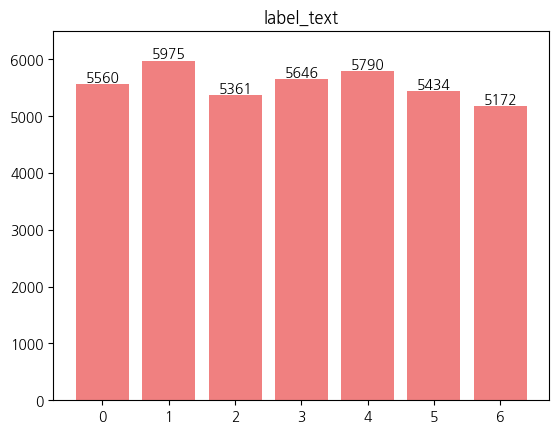

In [38]:
bar = plt.bar(RD_agg_train['target'].value_counts().index, RD_agg_train['target'].value_counts(), color = 'lightcoral')
plt.ylim(0, 10000)
plt.title('label_text')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

plt.show()

In [24]:
RD_agg_train.to_csv('/opt/level2_nlp_datacentric-nlp-12/data/RD_agg_train.csv', index=False)
RD_agg_val.to_csv('/opt/level2_nlp_datacentric-nlp-12/data/RD_agg_val.csv', index=False)

##### RS 증강

In [28]:
# 무작위로 문장 내에서 두 단어를 선택하고 위치를 바꾼다. 이것도 n번 반복

augmenter = RS(morpheme_analyzer = None)
result = augmenter(text, p = 0.1, repetition = 3)
print(text, '    ', result)

성범죄영상 유통 웹하드 특별수사 靑 청원 참여 20만 넘어        ['청원영상 유통 웹하드 특별수사 靑 성범죄 참여 20만 넘어', '성범죄영상 유통 靑 특별수사웹하드청원 참여 20만 넘어', '성범죄영상 유통 웹하드 靑 수사특별청원 참여 20만 넘어']


In [29]:
# def agg_RS(input_row) :
#     dfdf = pd.DataFrame()
#     text = input_row['text']
#     augmenter = RS(morpheme_analyzer = None)
#     repetition = 2ㅁ
#     result = augmenter(text, p = 0.1, repetition = repetition)
#     for i in range(repetition) :
#         rd_text = result[i]
#         dfdfdf = pd.DataFrame({'ID': [input_row['ID']],
#                             'text': [rd_text],
#                             'target': [input_row['target']],
#                             'url': [input_row['url']],
#                             'date': [input_row['date']],
#                             })
#         dfdf = pd.concat([dfdf,dfdfdf],ignore_index=True)
#     return dfdf

In [ ]:
def agg_RS(input_row) :
    dfdf = pd.DataFrame()
    text = input_row['text']
    augmenter = RS(morpheme_analyzer = None)
    result = augmenter(text, p = 0.1, repetition = 1)
    dfdfdf = pd.DataFrame({'ID': [input_row['ID']],
                        'text': [result],
                        'target': [input_row['target']],
                        'url': [input_row['url']],
                        'date': [input_row['date']],
                        })
    dfdf = pd.concat([dfdf,dfdfdf],ignore_index=True)
    return dfdf

In [ ]:
agg_dataframe_RS_train = pd.DataFrame()
for i in tqdm(range(0, len(dataset_train),2)) :  # 이 부분으로 증강 비율 조절 가능
    dfdfdf = agg_RS(dataset_train.iloc[i])
    agg_dataframe_RS_train = pd.concat([agg_dataframe_RS_train, dfdfdf], ignore_index=True)
agg_dataframe_RS_train

In [ ]:
agg_dataframe_RS_val = pd.DataFrame()
for i in tqdm(range(0, len(dataset_val),2)) :  # 이 부분으로 증강 비율 조절 가능
    dfdfdf = agg_RS(dataset_val.iloc[i])
    agg_dataframe_RS_val = pd.concat([agg_dataframe_RS_val, dfdfdf], ignore_index=True)
agg_dataframe_RS_val

In [ ]:
RS_agg_train = pd.concat([dataset_train, agg_dataframe_RS_train],ignore_index=True)
RS_agg_val = pd.concat([dataset_val, agg_dataframe_RS_val],ignore_index=True)

RS_agg_train = RS_agg_train.sample(frac=1).reset_index(drop=True)
RS_agg_val = RS_agg_val.sample(frac=1).reset_index(drop=True)


In [ ]:
print(RS_agg_train.shape)
print(RS_agg_val.shape)

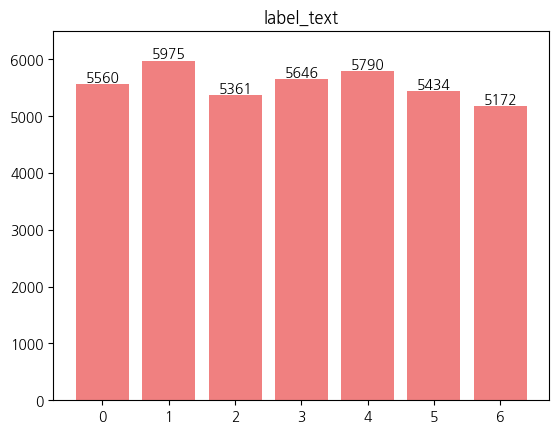

In [40]:
bar = plt.bar(RS_agg_train['target'].value_counts().index, RS_agg_train['target'].value_counts(), color = 'lightcoral')
plt.ylim(0, 12000)
plt.title('label_text')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 10)

plt.show()

In [36]:
RS_agg_train.to_csv('/opt/level2_nlp_datacentric-nlp-12/data/RS_agg_train.csv', index=False)
RS_agg_val.to_csv('/opt/level2_nlp_datacentric-nlp-12/data/RS_agg_val.csv', index=False)

##### 시도하지 않았지만 다른 방법들

In [46]:
# 문장에서 랜덤으로 stop words가 아닌 n 개의 단어들을 선택해 임의로 선택한 동의어들 중 하나로 바꾸는 기법.

augmenter = SR(morpheme_analyzer = None)
result = augmenter(text, p = 0.1, repetition = 3)
print(text, '    ', result)

성범죄영상 유통 웹하드 특별수사 靑 청원 참여 20만 넘어      ['성범죄영상 유통 웹하드 특별문초 靑 청원 참여 20만 넘어', '성범죄그림자 유통 웹하드 특별수사 靑 청원 참여 20만 넘어', '성범죄환상 유통 웹하드 특별수사 靑 청원 참여 20만 넘어']


In [47]:
# 문장 내에서 stop word를 제외한 나머지 단어들 중에서, 랜덤으로 선택한 단어의 동의어를 임의로 정한다. 그리고 동의어를 문장 내 임의의 자리에 넣는걸 n번 반복한다.

augmenter = RI(morpheme_analyzer = None)
result = augmenter(text, p = 0.1, repetition = 3)
print(text, '    ', result)

성범죄영상 유통 웹하드 특별수사 靑 청원 참여 20만 넘어      ['성범죄영상 유통 웹하드 특별수사 靑 청원 참여 20만 옛모습 넘어', '성범죄영상 유통 웹하드 특별수사 탐험 靑 청원 참여 20만 넘어', '성범죄 탐색 영상 유통 웹하드 특별수사 靑 청원 참여 20만 넘어']
